In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss, accuracy_score

In [2]:
train=pd.read_csv("/kaggle/input/mock-test-2-mse-2/train.csv")
test=pd.read_csv("/kaggle/input/mock-test-2-mse-2/test.csv")

In [3]:
train.isnull().sum()

id                  0
N_Days              0
Drug             6541
Age                 0
Sex                 0
Ascites          6540
Hepatomegaly     6543
Spiders          6552
Edema               0
Bilirubin           0
Cholesterol      8375
Albumin             0
Copper           6657
Alk_Phos         6547
SGOT             6551
Tryglicerides    8422
Platelets         582
Prothrombin        19
Stage               0
Status              0
dtype: int64

In [4]:
test.isnull().sum()

id                  0
N_Days              0
Drug             4300
Age                 0
Sex                 0
Ascites          4296
Hepatomegaly     4300
Spiders          4303
Edema               0
Bilirubin           0
Cholesterol      5558
Albumin             0
Copper           4372
Alk_Phos         4304
SGOT             4304
Tryglicerides    5578
Platelets         357
Prothrombin        14
Stage               0
dtype: int64

In [5]:
test_id=test['id']
test=test.drop(columns=['id'])

In [6]:
train=train.drop(columns=['id'])
X=train.drop(columns=['Status'])
y=train['Status']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
numeric_features=X.select_dtypes(include=['int64','float64']).columns
categorical_features=X.select_dtypes(include=['object']).columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


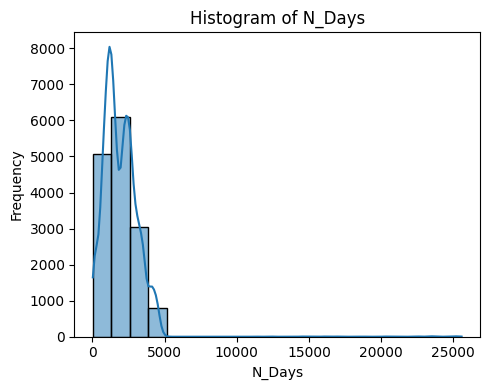

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


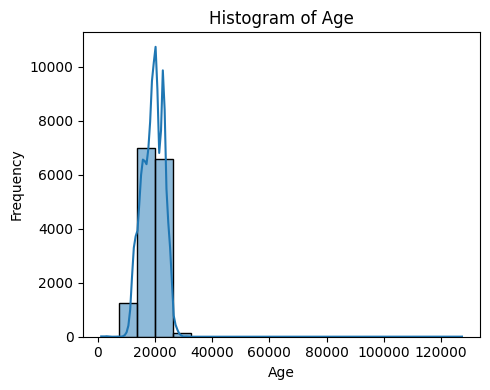

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


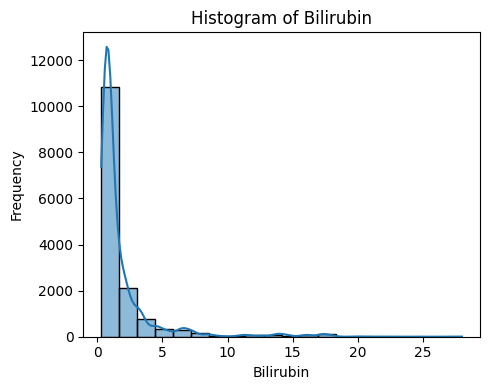

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


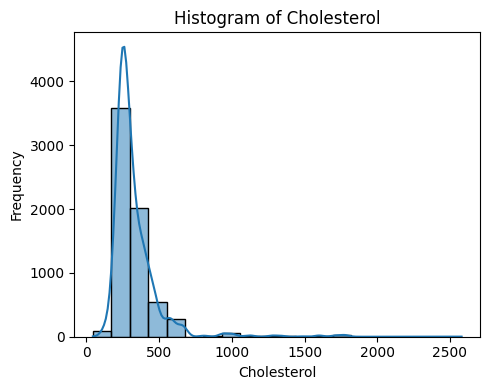

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


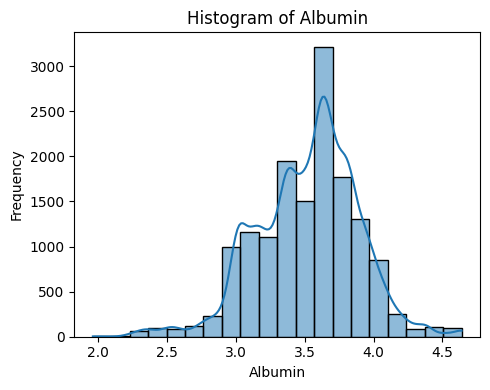

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


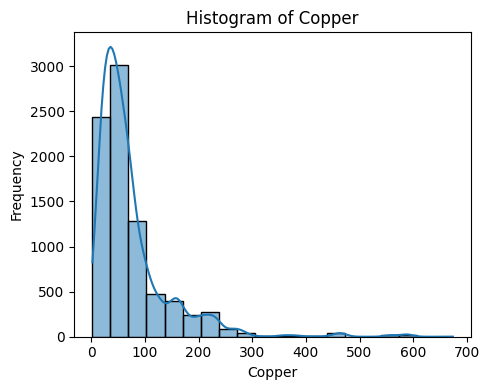

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


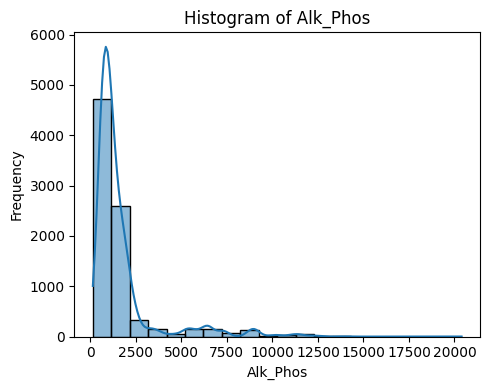

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


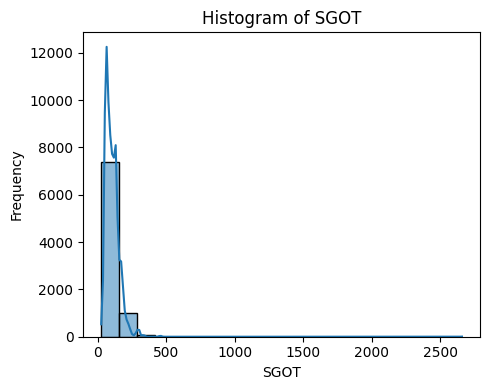

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


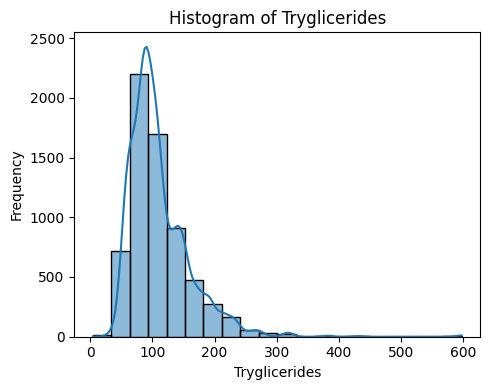

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


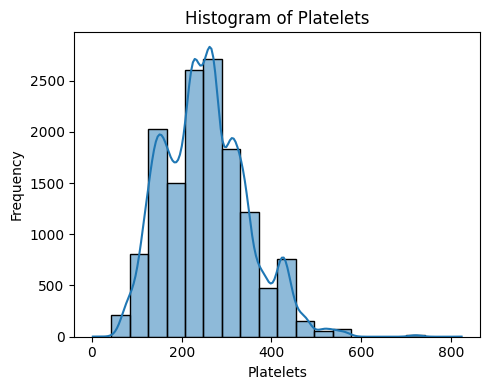

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


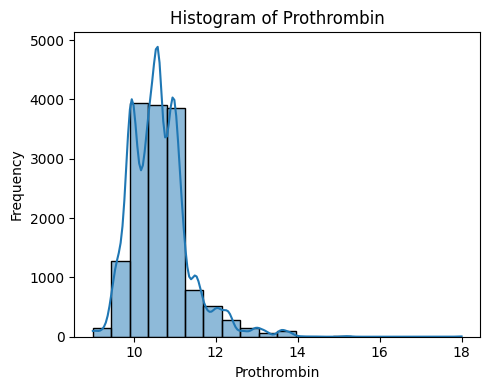

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


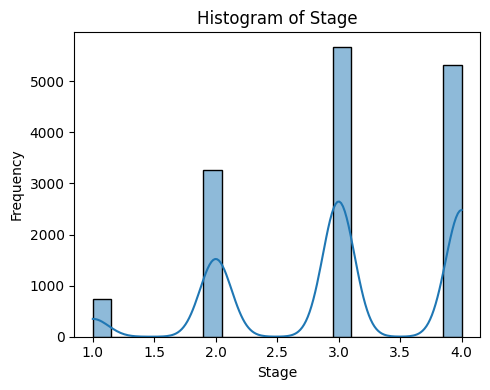

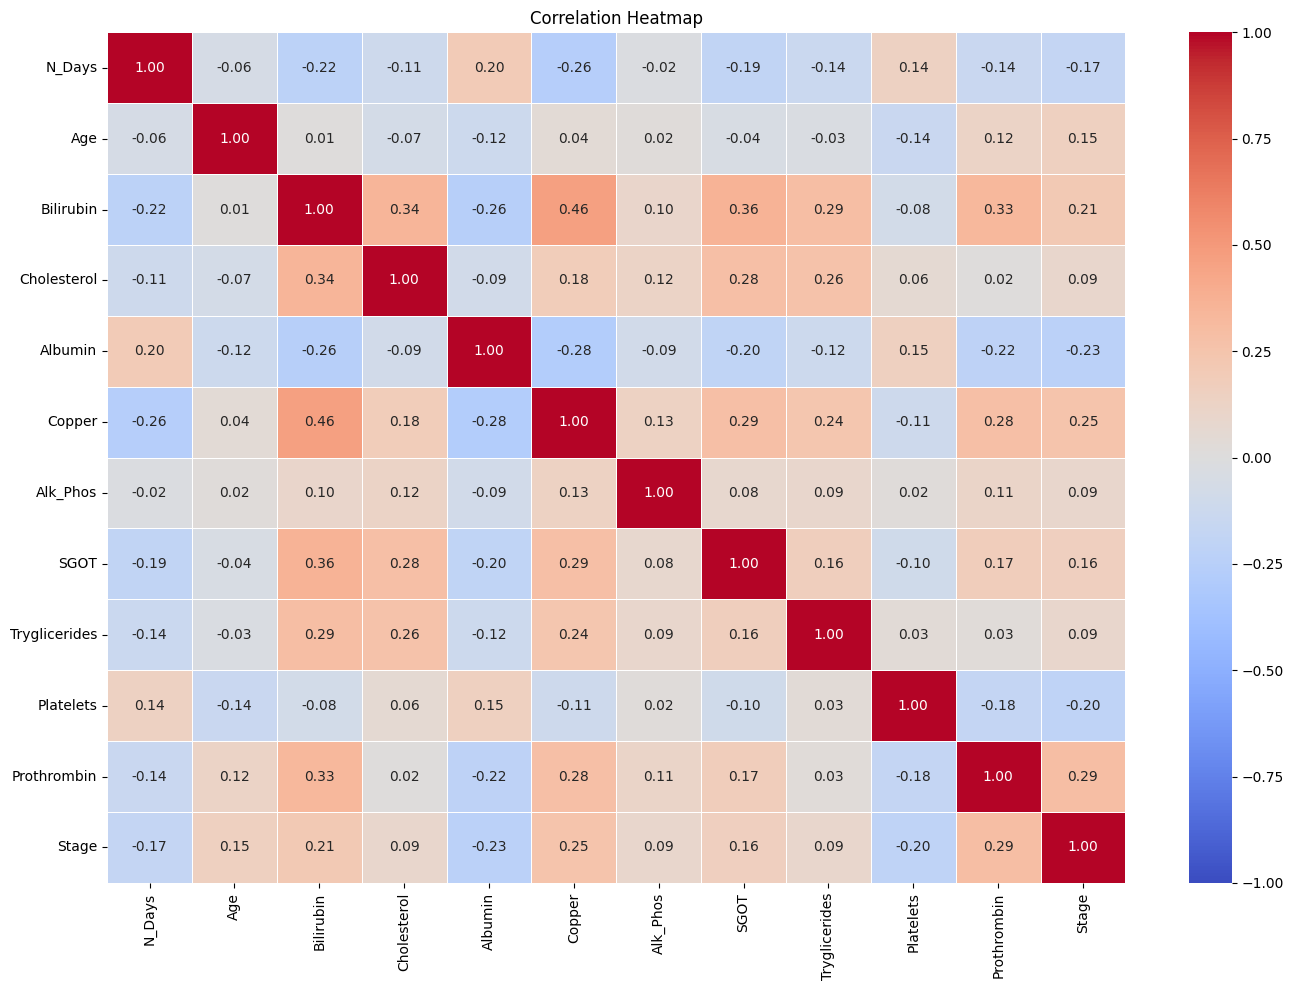

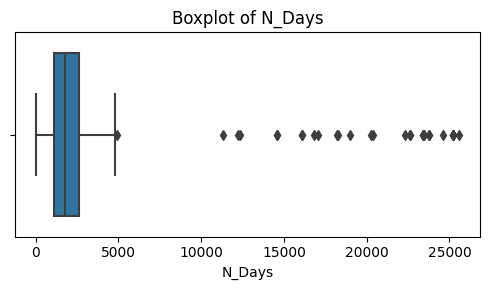

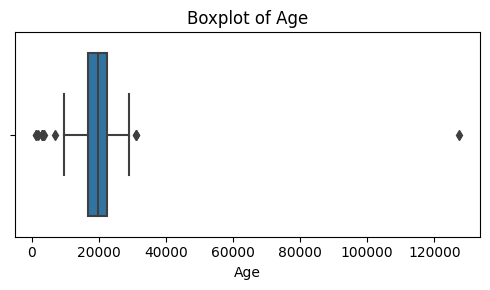

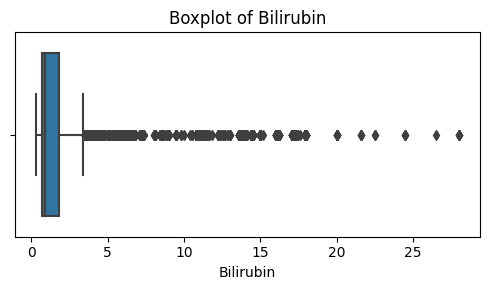

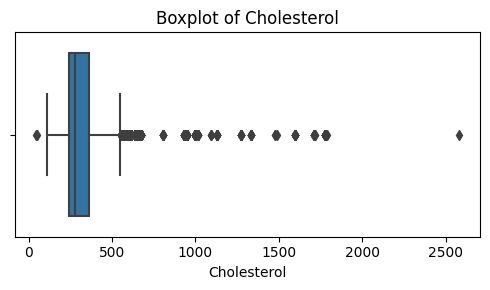

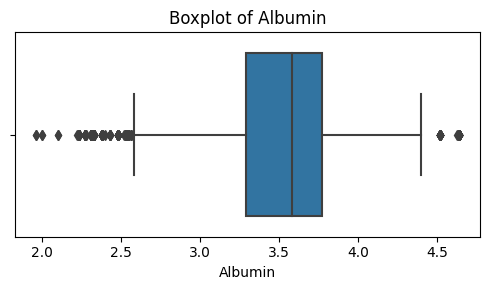

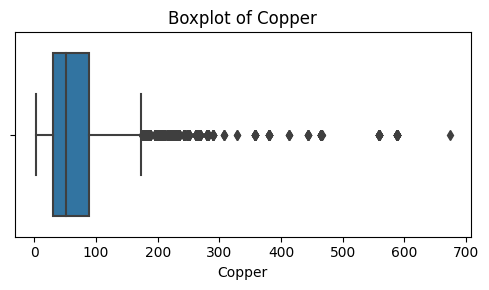

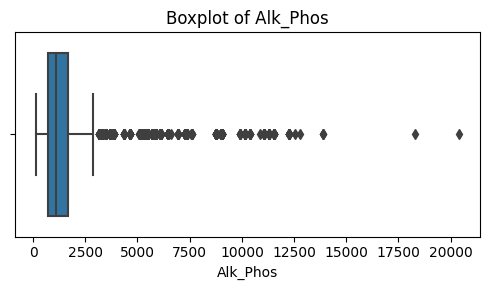

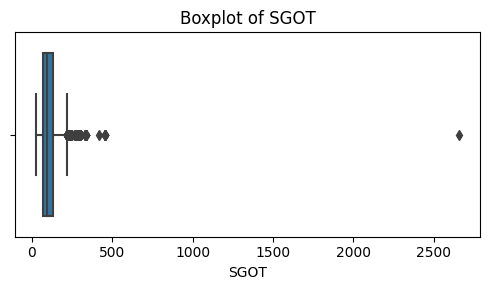

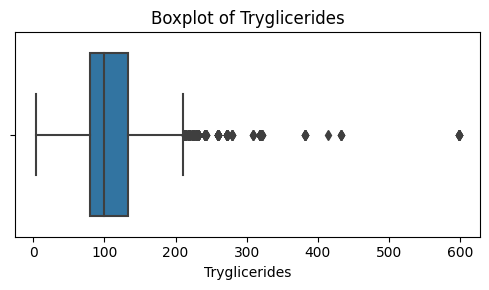

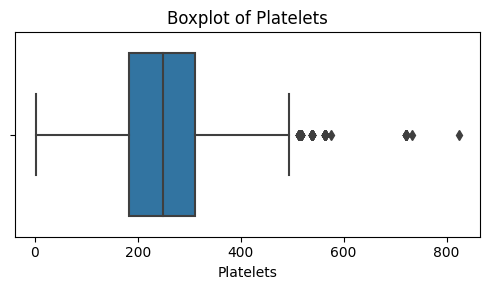

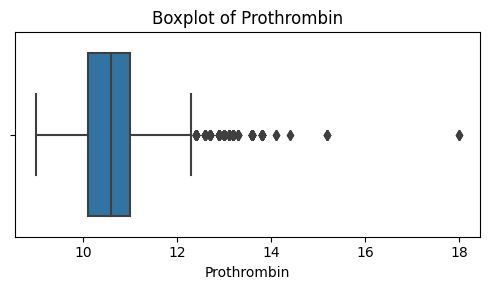

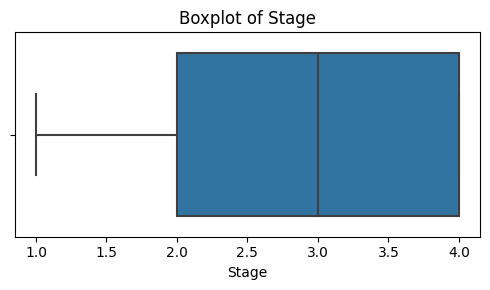

In [27]:
# ===================== HISTOGRAMS =====================
for col in numeric_features:
    plt.figure(figsize=(5, 4))
    sns.histplot(train[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# ===================== CORRELATION HEATMAP =====================
plt.figure(figsize=(14, 10))
sns.heatmap(
    train[numeric_features].corr(),
    cmap="coolwarm",
    annot=True,          # show values
    fmt=".2f",           # 2 decimal places
    linewidths=0.5,
    vmin=-1, vmax=1      # full correlation scale
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()



# ===================== BOXPLOTS =====================
for col in numeric_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [9]:
numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
preprocessing=ColumnTransformer(transformers=[
    ('num',numerical_pipeline,numeric_features),
    ('cat',categorical_pipeline,categorical_features)
])

In [11]:
model = GradientBoostingClassifier(
    n_estimators=920,
    learning_rate=0.02,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.7,
    random_state=42
)

In [12]:
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessing),
    ('model',model)
])

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # fit on train
y_test_enc = le.transform(y_test)        # transform test

In [14]:
pipeline.fit(X_train,y_train_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.02, max_depth=4,
                                            n_estimators=920, random_state=42,
                                            subsample=0.7))])

In [17]:
y_proba = pipeline.predict_proba(X_test)  # shape: (n_samples, n_classes)

y_pred = pipeline.predict(X_test)

In [18]:
loss = log_loss(y_test_enc, y_proba)
print("Log Loss:", loss)

accuracy = accuracy_score(y_test_enc, y_pred)
print("Accuracy:", accuracy)

Log Loss: 0.36614850574656443
Accuracy: 0.8573333333333333


In [19]:
y_final=pipeline.predict_proba(test)

In [20]:
y_final

array([[0.97055697, 0.00173664, 0.02770639],
       [0.98464701, 0.00249452, 0.01285847],
       [0.93089641, 0.00704385, 0.06205975],
       ...,
       [0.97111813, 0.00282133, 0.02606054],
       [0.25889328, 0.01018082, 0.7309259 ],
       [0.84049192, 0.01482701, 0.14468106]])

In [21]:
class_names = le.classes_  # use label encoder mapping
submission = pd.DataFrame(y_final, columns=[f"Status_{cls}" for cls in class_names])
submission.insert(0, 'id', test_id)
submission.to_csv("submission4.csv", index=False)
print("\n✅ Submission file created successfully!")
print(submission.head())



✅ Submission file created successfully!
      id  Status_C  Status_CL  Status_D
0  15000  0.970557   0.001737  0.027706
1  15001  0.984647   0.002495  0.012858
2  15002  0.930896   0.007044  0.062060
3  15003  0.088566   0.034003  0.877431
4  15004  0.980496   0.001421  0.018083
